# Demo1: Simple Harmonic Oscillator

In this jupyter notebook, we will learn how to use the Euler's method to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
x^{t^{n+1}} = x^{t^n} + v^{t^n} \times \Delta t,
$$
and 
$$
v^{t^{n+1}} = v^{t^n} + a^{t^n} \times \Delta t.
$$

### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: 
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [82]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method
#

# Step 1: set up the parameters of the problem
def solve_shm_euler(tmax=20,dt=0.01,A=1,k=1,m=1):
    omega0=np.sqrt(k/m)

# Step 2: set up the time and solution arrays
    t=np.arange(0,tmax,dt)
    x=np.zeros(len(t))
    v=np.zeros(len(t))

# Step 3: set up the initial conditions
    x[0]=1
    v[0]=0

# Step 4: solve the difference equation using the Euler method
    for n in range(1,len(t)):
        x[n]=x[n-1]+v[n-1]*dt
        v[n]=v[n-1]+(-omega0**2 *x[n-1])*dt
    return t,x,v




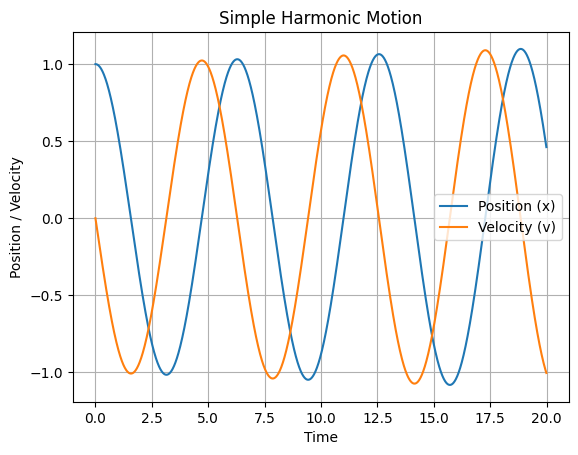

In [84]:
# Step 5: plot the solution

#TODO
t,x,v=solve_shm_euler()
plt.plot(t, x, label='Position (x)')
plt.plot(t, v, label='Velocity (v)')
plt.xlabel('Time')
plt.ylabel('Position / Velocity')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()






We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

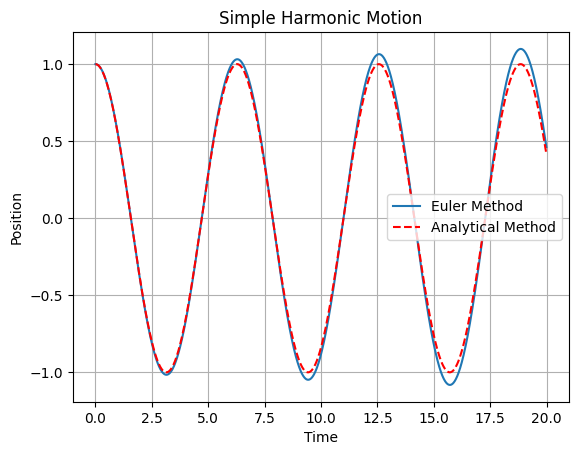

In [85]:
# Step 6: evaluate the analytical solution and plot it

# TODO
def solve_shm_analytical(tmax=20,dt=0.01,A=1,k=1,m=1):
    omega0=np.sqrt(k/m)
    t_a=np.arange(0,tmax,dt)
    x_a=A*np.cos(omega0*t)
    v_a=-A*omega0*np.sin(omega0*t)
    return t_a,x_a,v_a

t_a,x_a,v_a=solve_shm_analytical()

plt.plot(t, x, label='Euler Method')
plt.plot(t_a, x_a,'r--', label='Analytical Method')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()









Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

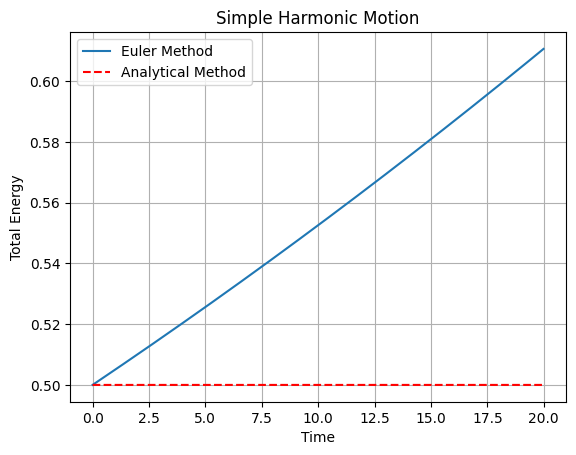

In [86]:
# Step 7: evaluate the energy (error) of the system

# TODO 
total_energy=v**2 /2+x**2 /2
total_energy_ana=v_a**2 /2+x_a**2 /2

plt.plot(t, total_energy,label='Euler Method')
plt.plot(t_a,total_energy_ana,'r--',label='Analytical Method')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()






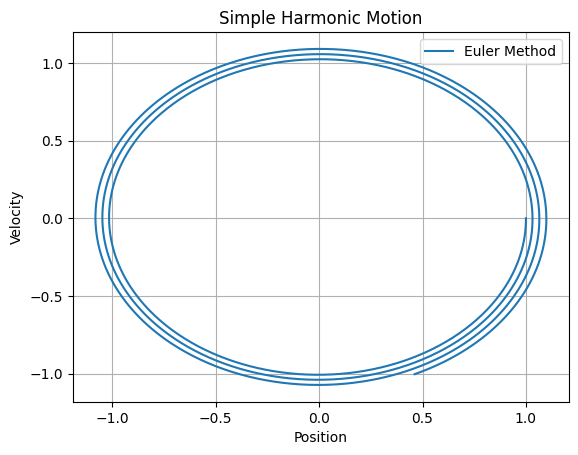

In [87]:
# Step 8: evaluate the phase space

# TODO
plt.plot(x, v, label="Euler Method")
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()








## Exercise 2: 
Check if the accuracy can be improved by reducing the time step to $\Delta t=0.001$.

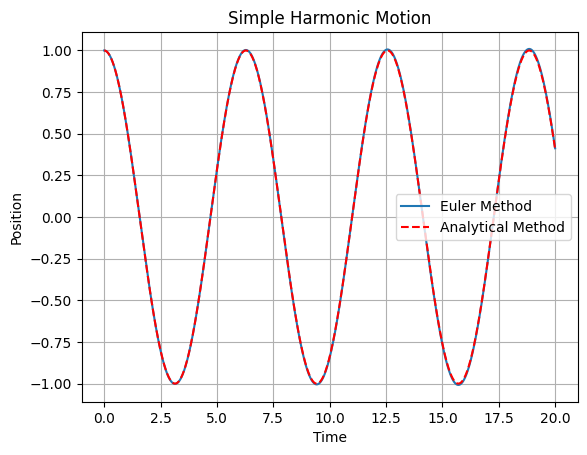

In [88]:
# TODO
t,x,v=solve_shm_euler(dt=0.001)

plt.plot(t, x, label='Euler Method')
plt.plot(t_a, x_a,'r--', label='Analytical Method')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()





### Note

Reducing the time step is not the best solution. The better solution is to use higher-order schemes. Do NOT use Eulter's method in any production runs. 